# MLP
Cell line 07 NCI.H460

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was a learn fail during CV.

MCC mean 0.1492

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 16:27:05.166887


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=7]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]


2023-04-29 16:27:06.954224
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 695
Num RCI: 695
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 695 sequences.

Training # 1 1
2023-04-29 16:27:10.341789
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-0.674878139095353, -2.861161611482583]
Variances [2.21132402 2.78775347]
Priors [0.65643721 0.34356279]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 421:139 75.18%
Computed class weights: {0: 2.014388489208633, 1: 0.665083135391924}
Valid 1:0 97:38 71.85%
FIT


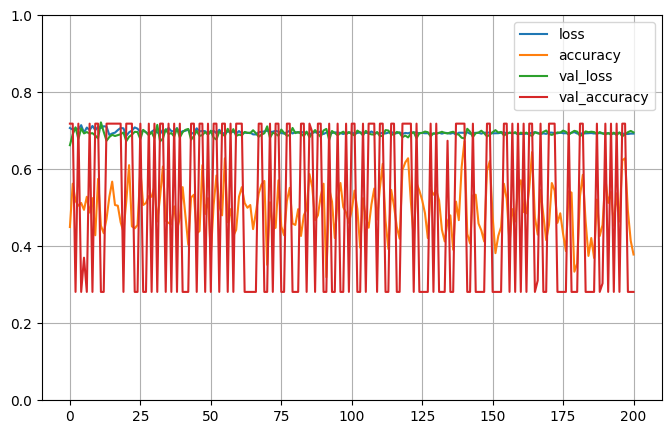


Testing # 1 1
2023-04-29 16:27:54.091862
PREDICT
Test 1:0 97:38 71.85%
Predict 1:0 135:0 100.00%
Test sizes (135, 1025) (135,)
Distrib of scores: 0.5018358 mean 0.00016767811 std
Range of scores: 0.50140345 to 0.50225025
Score threshold 0.5
Confusion matrix
 [[ 0 38]
 [ 0 97]]
Normalized matrix
 [[0.         0.28148148]
 [0.         0.71851852]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


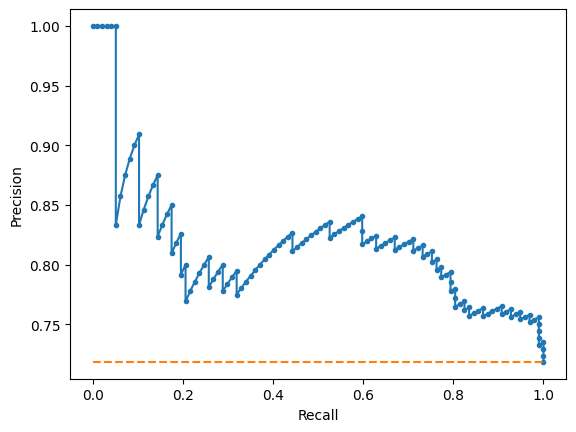

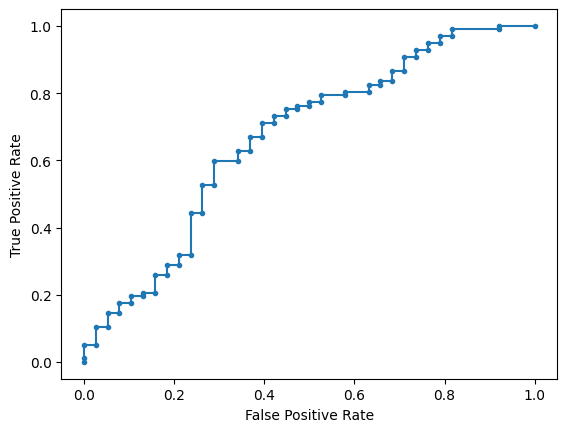

Accuracy: 71.85% Precision: 71.85% Recall: 100.00%
F1: 83.62% MCC: 0.0000
AUPRC: 81.56% AUROC: 66.77%
 accuracy [71.85185185185186]
 precision [71.85185185185186]
 recall [100.0]
 F1 [83.62068965517241]
 MCC [0.0]
 AUPRC [81.56472809464785]
 AUROC [66.76614215952253]

Training # 1 2
2023-04-29 16:27:55.060137
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-2.8169208029700132, -0.7753932199047243]
Variances [3.57287425 2.28251017]
Priors [0.33531279 0.66468721]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 442:117 79.07%
Computed class weights: {0: 2.388888888888889, 1: 0.6323529411764706}
Valid 1:0 103:33 75.74%
FIT


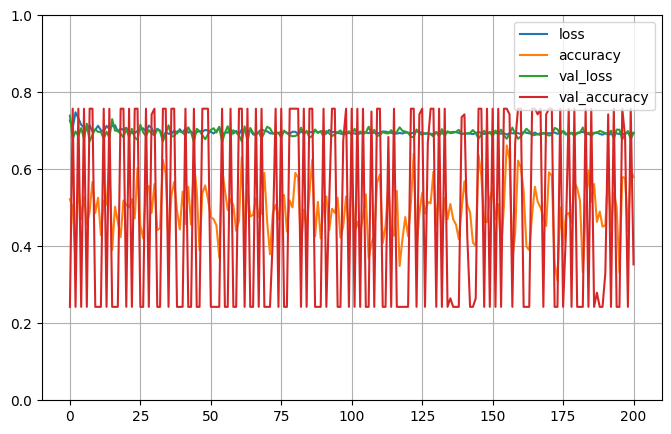


Testing # 1 2
2023-04-29 16:28:38.567232
PREDICT
Test 1:0 103:33 75.74%
Predict 1:0 136:0 100.00%
Test sizes (136, 1025) (136,)
Distrib of scores: 0.5046885 mean 0.00022764198 std
Range of scores: 0.5039828 to 0.5051205
Score threshold 0.5
Confusion matrix
 [[  0  33]
 [  0 103]]
Normalized matrix
 [[0.         0.24264706]
 [0.         0.75735294]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


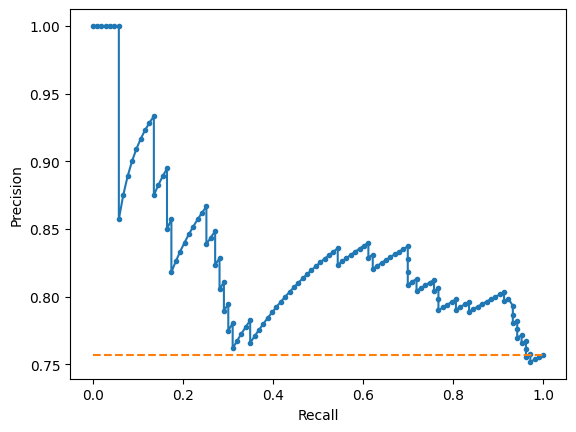

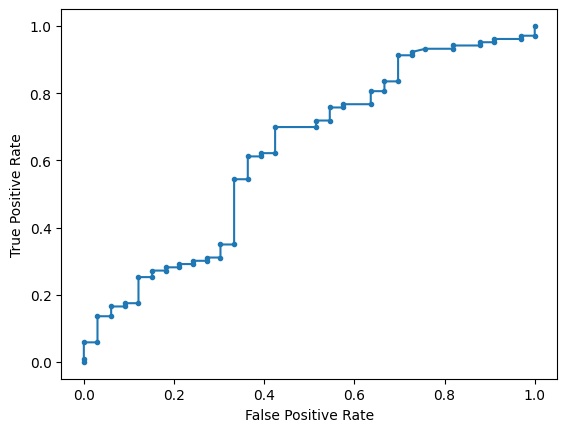

Accuracy: 75.74% Precision: 75.74% Recall: 100.00%
F1: 86.19% MCC: 0.0000
AUPRC: 82.91% AUROC: 62.27%
 accuracy [75.73529411764706]
 precision [75.73529411764706]
 recall [100.0]
 F1 [86.19246861924687]
 MCC [0.0]
 AUPRC [82.90813342376579]
 AUROC [62.268314210061796]

Training # 1 3
2023-04-29 16:28:39.136254
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-2.972700266685897, -0.783535708791659]
Variances [3.52257613 2.28885693]
Priors [0.31910587 0.68089413]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 442:115 79.35%
Computed class weights: {0: 2.4217391304347826, 1: 0.6300904977375565}
Valid 1:0 112:26 81.16%
FIT


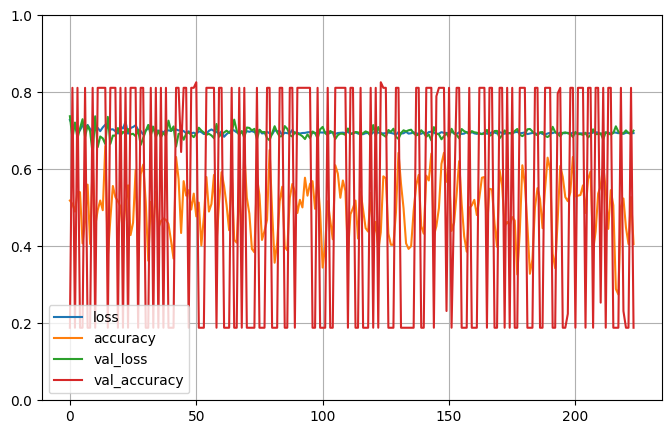


Testing # 1 3
2023-04-29 16:29:11.372658
PREDICT
Test 1:0 112:26 81.16%
Predict 1:0 128:10 92.75%
Test sizes (138, 1025) (138,)
Distrib of scores: 0.50015014 mean 9.645257e-05 std
Range of scores: 0.49985707 to 0.50041
Score threshold 0.5
Confusion matrix
 [[  6  20]
 [  4 108]]
Normalized matrix
 [[0.04347826 0.14492754]
 [0.02898551 0.7826087 ]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


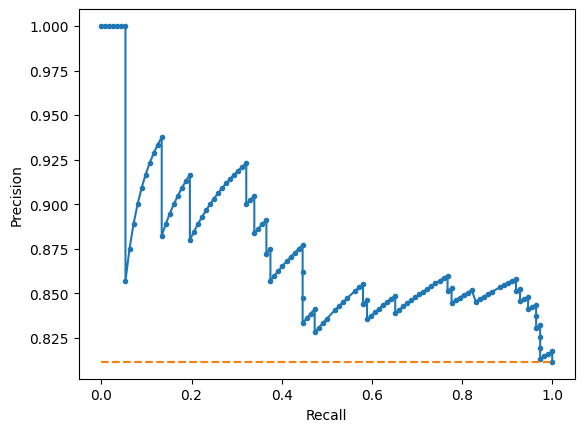

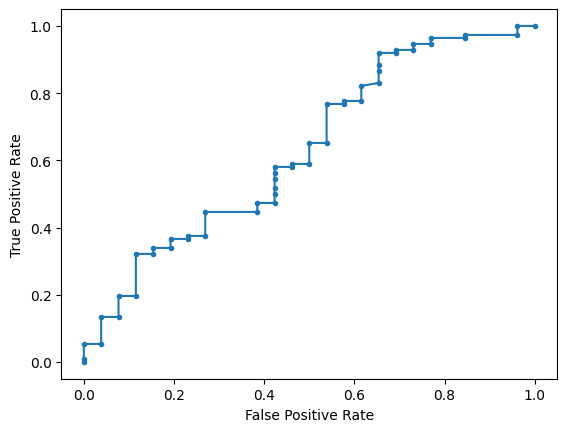

Accuracy: 82.61% Precision: 84.38% Recall: 96.43%
F1: 90.00% MCC: 0.2942
AUPRC: 87.33% AUROC: 63.20%
 accuracy [82.6086956521739]
 precision [84.375]
 recall [96.42857142857143]
 F1 [89.99999999999999]
 MCC [0.29420338520848444]
 AUPRC [87.3348954955474]
 AUROC [63.20398351648352]

Training # 1 4
2023-04-29 16:29:11.974030
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-0.7679210042506435, -3.1396254229139804]
Variances [2.07301788 2.84430659]
Priors [0.69255608 0.30744392]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 437:126 77.62%
Computed class weights: {0: 2.234126984126984, 1: 0.6441647597254004}
Valid 1:0 105:27 79.55%
FIT


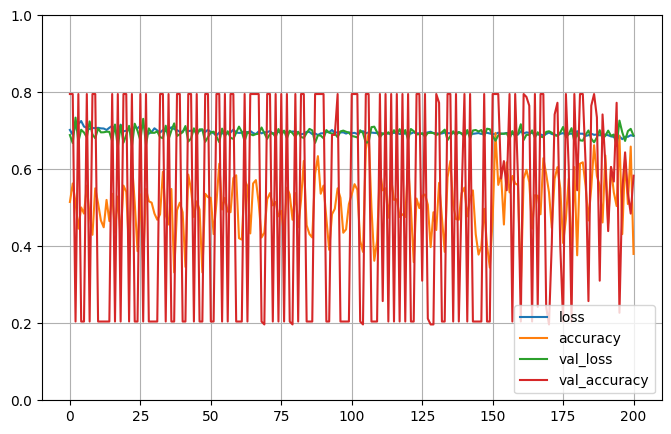


Testing # 1 4
2023-04-29 16:29:39.240414
PREDICT
Test 1:0 105:27 79.55%
Predict 1:0 132:0 100.00%
Test sizes (132, 1025) (132,)
Distrib of scores: 0.5056642 mean 0.0004595367 std
Range of scores: 0.50445384 to 0.50678915
Score threshold 0.5
Confusion matrix
 [[  0  27]
 [  0 105]]
Normalized matrix
 [[0.         0.20454545]
 [0.         0.79545455]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


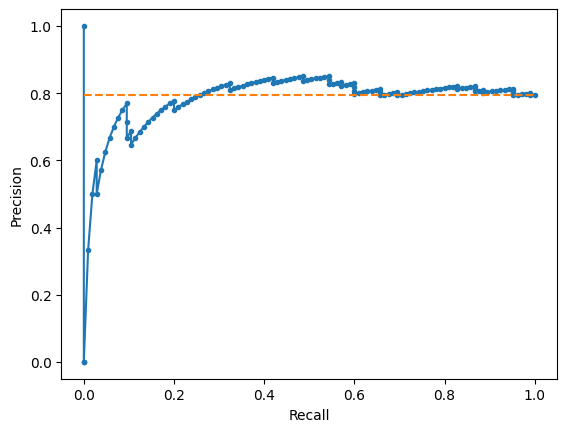

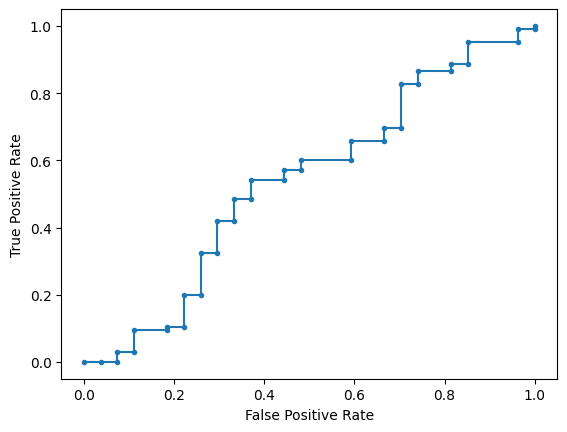

Accuracy: 79.55% Precision: 79.55% Recall: 100.00%
F1: 88.61% MCC: 0.0000
AUPRC: 78.17% AUROC: 53.76%
 accuracy [79.54545454545455]
 precision [79.54545454545455]
 recall [100.0]
 F1 [88.60759493670885]
 MCC [0.0]
 AUPRC [78.17468836777032]
 AUROC [53.75661375661376]

Training # 1 5
2023-04-29 16:29:39.813859
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-3.1466665043252378, -0.7729560365720564]
Variances [3.14015288 2.10361337]
Priors [0.31392913 0.68607087]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 424:117 78.37%
Computed class weights: {0: 2.3119658119658117, 1: 0.6379716981132075}
Valid 1:0 122:32 79.22%
FIT


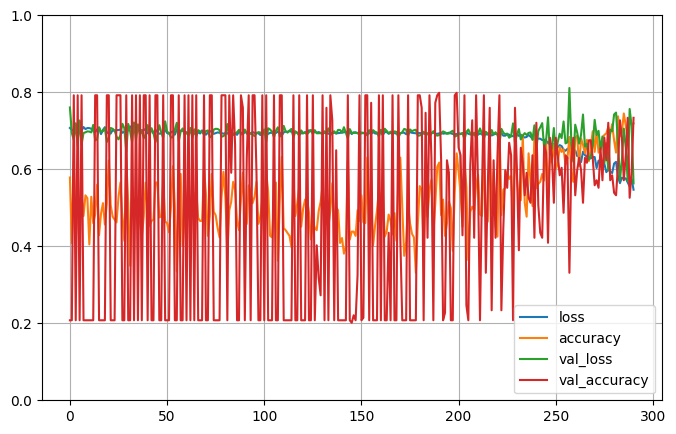


Testing # 1 5
2023-04-29 16:30:18.287766
PREDICT
Test 1:0 122:32 79.22%
Predict 1:0 153:1 99.35%
Test sizes (154, 1025) (154,)
Distrib of scores: 0.5036857 mean 0.0014952271 std
Range of scores: 0.49996778 to 0.5069393
Score threshold 0.5
Confusion matrix
 [[  1  31]
 [  0 122]]
Normalized matrix
 [[0.00649351 0.2012987 ]
 [0.         0.79220779]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


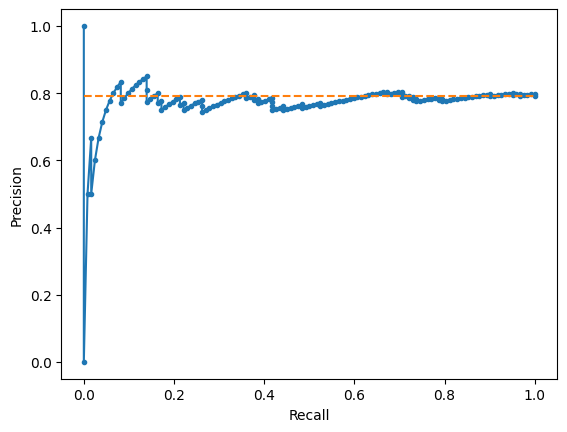

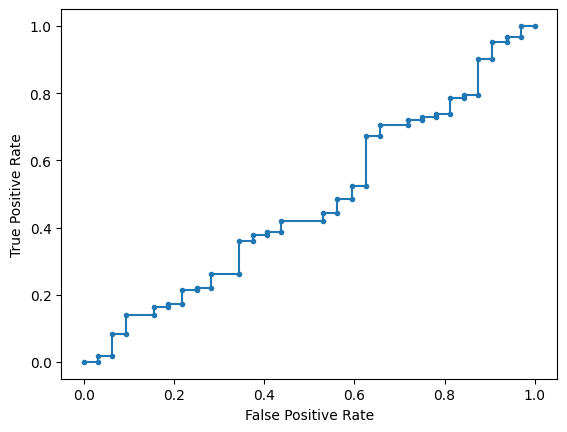

Accuracy: 79.87% Precision: 79.74% Recall: 100.00%
F1: 88.73% MCC: 0.1579
AUPRC: 77.27% AUROC: 47.41%
 accuracy [79.87012987012987]
 precision [79.73856209150327]
 recall [100.0]
 F1 [88.72727272727273]
 MCC [0.15785531556965313]
 AUPRC [77.26812095737444]
 AUROC [47.41290983606557]

Training # 2 1
2023-04-29 16:30:18.843705
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-0.7186933966809125, -2.814725000818238]
Variances [2.19027192 3.29092014]
Priors [0.68614985 0.31385015]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 431:112 79.37%
Computed class weights: {0: 2.424107142857143, 1: 0.6299303944315545}
Valid 1:0 112:40 73.68%
FIT


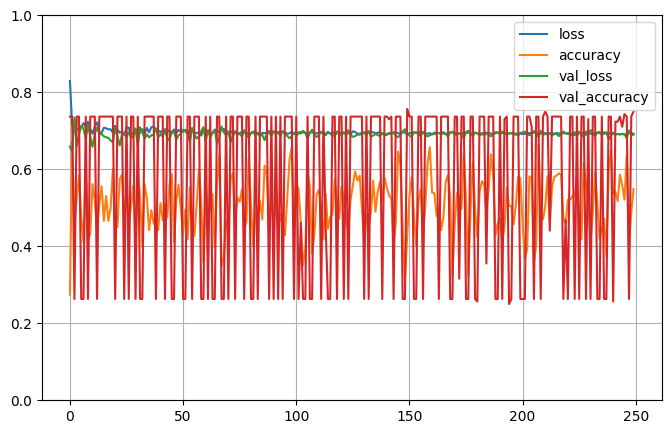


Testing # 2 1
2023-04-29 16:31:01.903834
PREDICT
Test 1:0 112:40 73.68%
Predict 1:0 133:19 87.50%
Test sizes (152, 1025) (152,)
Distrib of scores: 0.5002498 mean 0.00019848504 std
Range of scores: 0.49970722 to 0.50069547
Score threshold 0.5
Confusion matrix
 [[ 11  29]
 [  8 104]]
Normalized matrix
 [[0.07236842 0.19078947]
 [0.05263158 0.68421053]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


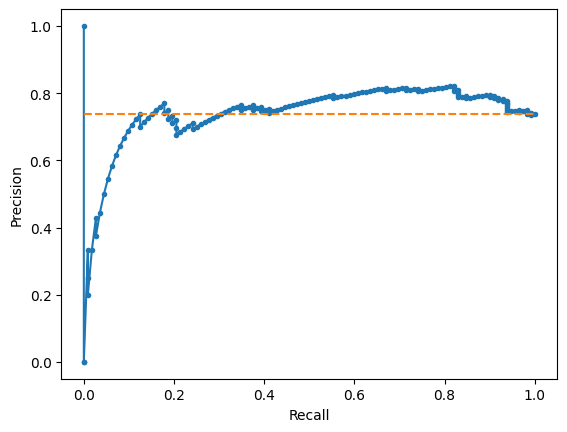

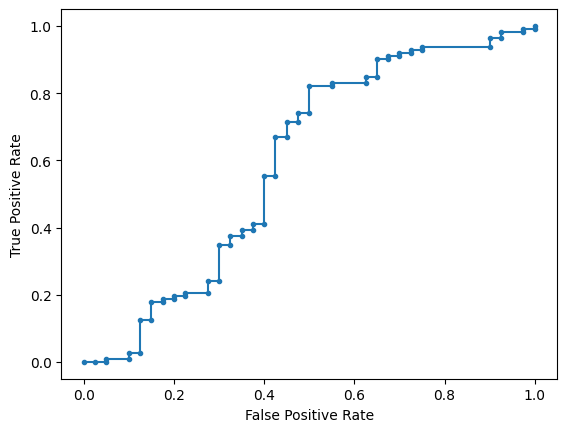

Accuracy: 75.66% Precision: 78.20% Recall: 92.86%
F1: 84.90% MCC: 0.2711
AUPRC: 74.07% AUROC: 59.44%
 accuracy [75.6578947368421]
 precision [78.19548872180451]
 recall [92.85714285714286]
 F1 [84.89795918367348]
 MCC [0.27105237087157535]
 AUPRC [74.07010743504112]
 AUROC [59.44196428571429]

Training # 2 2
2023-04-29 16:31:02.514742
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-0.8035106921314272, -2.925199590557175]
Variances [2.06551075 3.14625631]
Priors [0.66007084 0.33992916]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 430:137 75.84%
Computed class weights: {0: 2.0693430656934306, 1: 0.6593023255813953}
Valid 1:0 103:25 80.47%
FIT


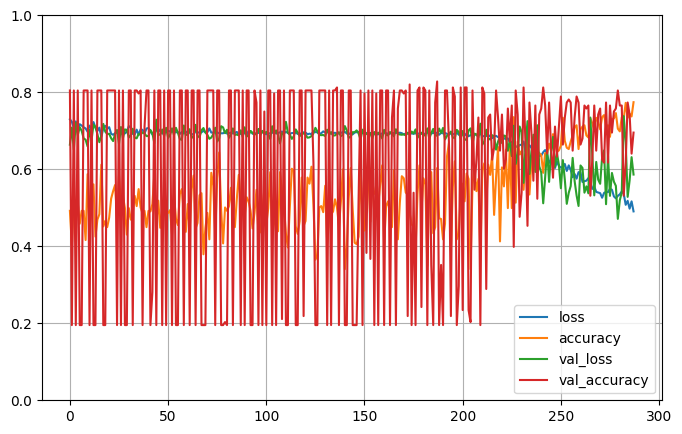


Testing # 2 2
2023-04-29 16:31:45.564763
PREDICT
Test 1:0 103:25 80.47%
Predict 1:0 119:9 92.97%
Test sizes (128, 1025) (128,)
Distrib of scores: 0.50431097 mean 0.0023692432 std
Range of scores: 0.49737245 to 0.5092644
Score threshold 0.5
Confusion matrix
 [[  6  19]
 [  3 100]]
Normalized matrix
 [[0.046875  0.1484375]
 [0.0234375 0.78125  ]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


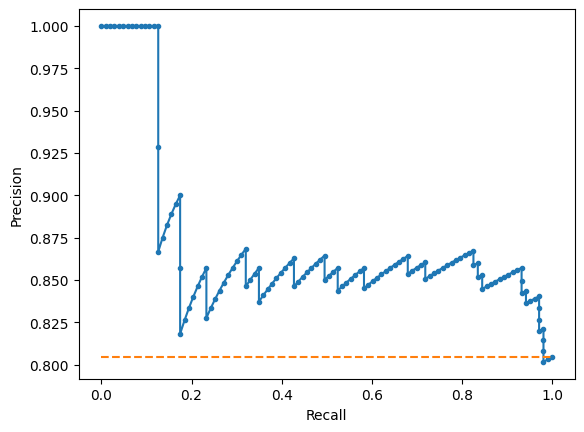

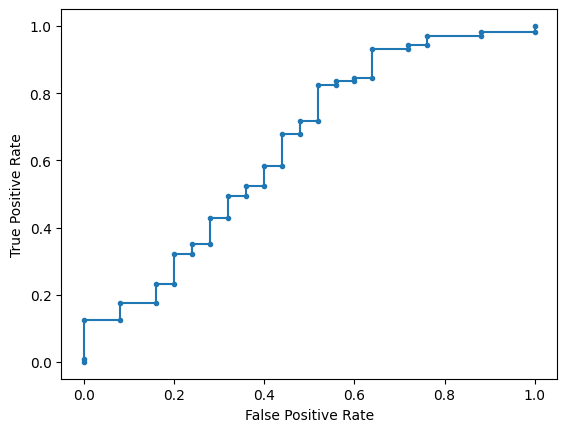

Accuracy: 82.81% Precision: 84.03% Recall: 97.09%
F1: 90.09% MCC: 0.3270
AUPRC: 87.10% AUROC: 64.39%
 accuracy [82.8125]
 precision [84.03361344537815]
 recall [97.0873786407767]
 F1 [90.09009009009009]
 MCC [0.3269764523503382]
 AUPRC [87.09664648764857]
 AUROC [64.38834951456312]

Training # 2 3
2023-04-29 16:31:46.164209
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-0.7765978567101434, -3.06878344992414]
Variances [2.1749364  3.12006056]
Priors [0.68172814 0.31827186]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 439:120 78.53%
Computed class weights: {0: 2.3291666666666666, 1: 0.6366742596810934}
Valid 1:0 107:29 78.68%
FIT


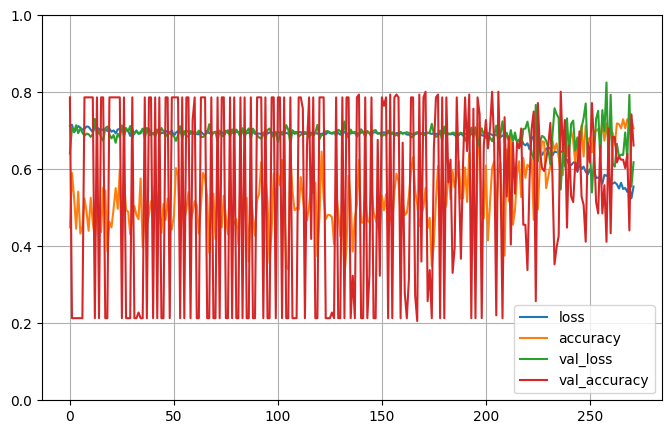


Testing # 2 3
2023-04-29 16:32:24.156091
PREDICT
Test 1:0 107:29 78.68%
Predict 1:0 132:4 97.06%
Test sizes (136, 1025) (136,)
Distrib of scores: 0.5036597 mean 0.001697897 std
Range of scores: 0.49829763 to 0.5080661
Score threshold 0.5
Confusion matrix
 [[  3  26]
 [  1 106]]
Normalized matrix
 [[0.02205882 0.19117647]
 [0.00735294 0.77941176]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


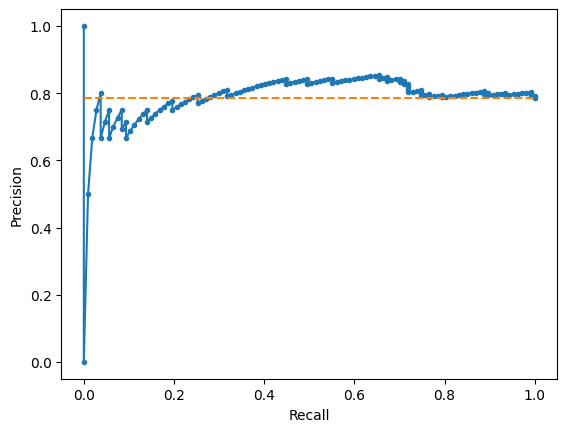

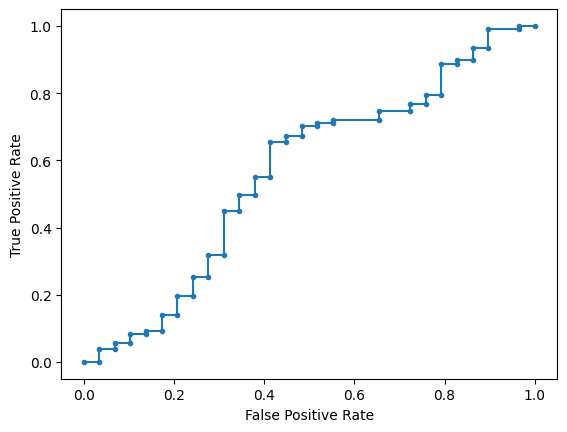

Accuracy: 80.15% Precision: 80.30% Recall: 99.07%
F1: 88.70% MCC: 0.2281
AUPRC: 78.99% AUROC: 56.30%
 accuracy [80.14705882352942]
 precision [80.3030303030303]
 recall [99.06542056074767]
 F1 [88.70292887029288]
 MCC [0.22812611389976004]
 AUPRC [78.98658992429594]
 AUROC [56.30035449564937]

Training # 2 4
2023-04-29 16:32:24.765760
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-0.7477164028308976, -2.8625591421473326]
Variances [2.32046724 3.37926008]
Priors [0.64583384 0.35416616]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 414:135 75.41%
Computed class weights: {0: 2.033333333333333, 1: 0.6630434782608695}
Valid 1:0 112:34 76.71%
FIT


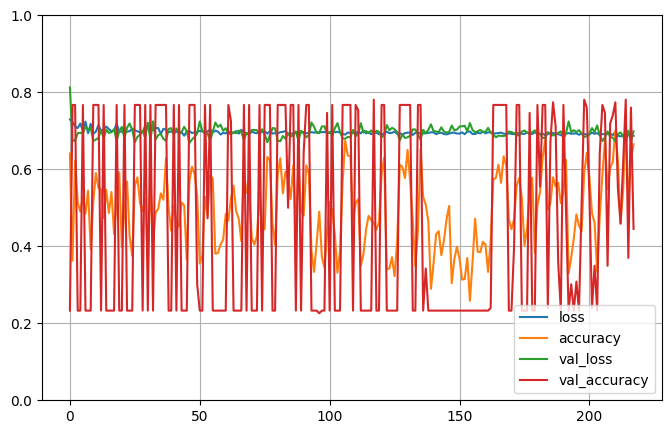


Testing # 2 4
2023-04-29 16:32:56.661734
PREDICT
Test 1:0 112:34 76.71%
Predict 1:0 144:2 98.63%
Test sizes (146, 1025) (146,)
Distrib of scores: 0.5009239 mean 0.00039764232 std
Range of scores: 0.4998651 to 0.5020156
Score threshold 0.5
Confusion matrix
 [[  2  32]
 [  0 112]]
Normalized matrix
 [[0.01369863 0.21917808]
 [0.         0.76712329]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


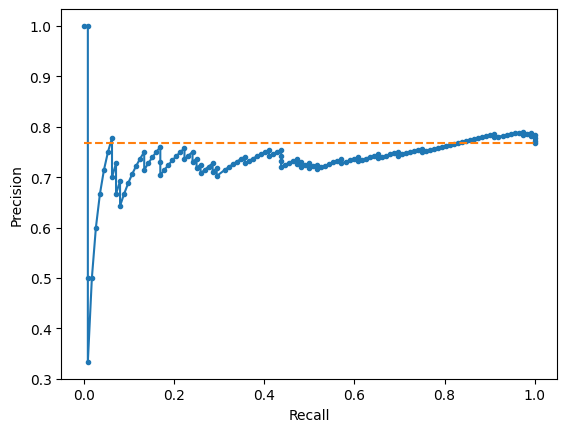

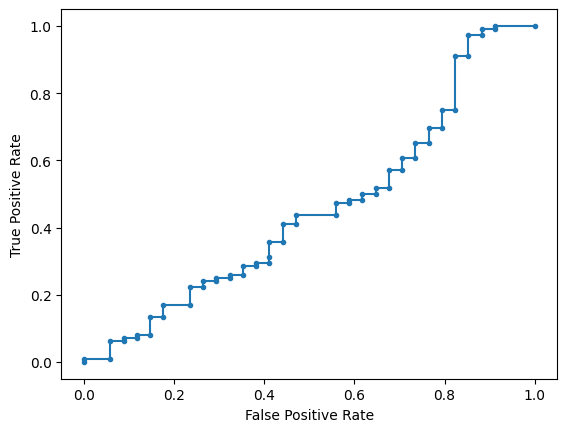

Accuracy: 78.08% Precision: 77.78% Recall: 100.00%
F1: 87.50% MCC: 0.2139
AUPRC: 73.84% AUROC: 45.48%
 accuracy [78.08219178082192]
 precision [77.77777777777779]
 recall [100.0]
 F1 [87.50000000000001]
 MCC [0.2138963159732493]
 AUPRC [73.83840542128696]
 AUROC [45.483193277310924]

Training # 2 5
2023-04-29 16:32:57.284362
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-0.747077923644307, -3.228658775425805]
Variances [2.24887117 2.96795681]
Priors [0.70680356 0.29319644]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 446:116 79.36%
Computed class weights: {0: 2.4224137931034484, 1: 0.6300448430493274}
Valid 1:0 110:23 82.71%
FIT


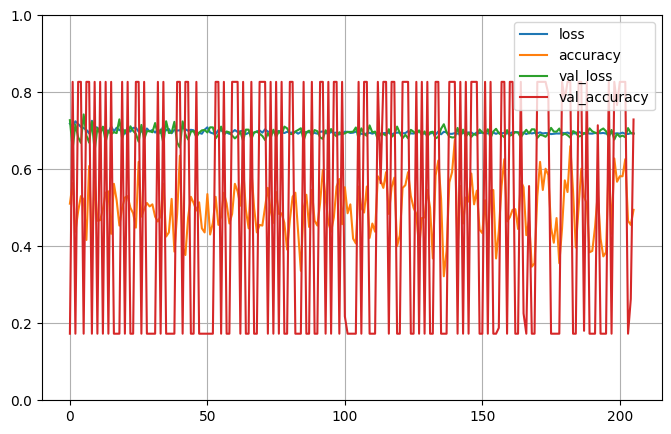


Testing # 2 5
2023-04-29 16:33:42.739747
PREDICT
Test 1:0 110:23 82.71%
Predict 1:0 133:0 100.00%
Test sizes (133, 1025) (133,)
Distrib of scores: 0.5105973 mean 0.00013582528 std
Range of scores: 0.5101851 to 0.5110146
Score threshold 0.5
Confusion matrix
 [[  0  23]
 [  0 110]]
Normalized matrix
 [[0.         0.17293233]
 [0.         0.82706767]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


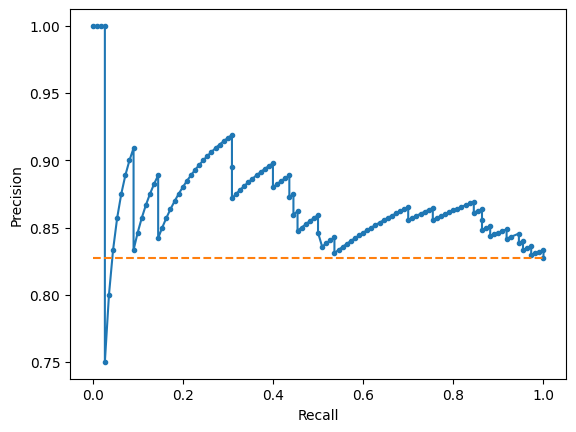

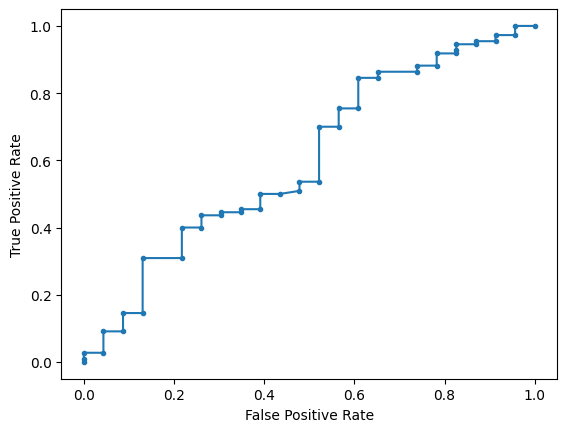

Accuracy: 82.71% Precision: 82.71% Recall: 100.00%
F1: 90.53% MCC: 0.0000
AUPRC: 86.68% AUROC: 60.26%
 accuracy [82.70676691729322]
 precision [82.70676691729322]
 recall [100.0]
 F1 [90.53497942386831]
 MCC [0.0]
 AUPRC [86.68071028729673]
 AUROC [60.25691699604744]
2023-04-29 16:33:43.351256


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 78.90% std 3.61
 precision mean 79.43% std 3.84
 recall mean 98.54% std 2.40
 F1 mean 87.89% std 2.32
 MCC mean 0.1492 std 0.1362
 AUPRC mean 80.79% std 5.15
 AUROC mean 57.93% std 7.15
 accuracy [[71.85185185185186], [75.73529411764706], [82.6086956521739], [79.54545454545455], [79.87012987012987], [75.6578947368421], [82.8125], [80.14705882352942], [78.08219178082192], [82.70676691729322]]
 precision [[71.85185185185186], [75.73529411764706], [84.375], [79.54545454545455], [79.73856209150327], [78.19548872180451], [84.03361344537815], [80.3030303030303], [77.77777777777779], [82.70676691729322]]
 recall [[100.0], [100.0], [96.42857142857143], [100.0], [100.0], [92.85714285714286], [97.0873786407767], [99.06542056074767], [100.0], [100.0]]
 F1 [[83.62068965517241], [86.19246861924687], [89.99999999999999], [88.60759493670885], [88.72727272727273], [84.89795918367348], [90.09009009009009], [88.70292887029288], [87.50000000000001], [90.53497942386831]]
 MCC [[0.0], [0.0],